# Car price priditator

# New Section

# importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing the original dataset before cleaning

In [6]:
car=pd.read_csv('quikr_car.csv')

To see the dataset contains car.head()

In [7]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


car.shape will give the tuples that is number of rows v/s cloumns

In [9]:
car.shape

(892, 6)

In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


the data given is not suitable we need to change it since the many attributes are Dtype is object but we need to change it into int
1. isnull() function to check the there value is present or not
2. unique() function is to check all the values are of right type or not

In [12]:
backup=car.copy()

# Quality
1. names are pretty inconsistent
2. names have company names attached to it
3. some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
4. company: many of the names are not of any company like 'Used', 'URJENT', and so on.
5. year has many non-year values
6. year is in object. Change to integer
7. Price has Ask for Price
8. Price has commas in its prices and is in object
9. kms_driven has object values with kms at last.
10. It has nan values and two rows have 'Petrol' in them
fuel_type has nan values
Cleaning Data
year has many non-year values

this is boolean based indexing to filter the array


In [13]:
car=car[car['year'].str.isnumeric()]

In [14]:
car['year']=car['year'].astype(int)

In [17]:
car['Price']!='Ask For Price'

0       True
1       True
2      False
3       True
4       True
       ...  
886     True
888     True
889     True
890     True
891     True
Name: Price, Length: 842, dtype: bool

In [18]:
car=car[car['Price']!='Ask For Price']

In [20]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [26]:
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [29]:
car['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 817, dtype: object

It has nan values and two rows have 'Petrol' in kms_driven

In [28]:
car=car[car['kms_driven'].str.isnumeric()]

In [30]:
car['kms_driven']=car['kms_driven'].astype(int)

In [32]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

fuel_type has nan values

In [33]:
car=car[~car['fuel_type'].isna()]

In [34]:
car.shape

(816, 6)

(892, 6) this was initial data set size.

In [35]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [36]:
car['name']

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
6                                   Ford Figo
                        ...                  
883                Maruti Suzuki Ritz VXI ABS
885                 Tata Indica V2 DLE BS III
886                      Toyota Corolla Altis
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

the car name is long hence consider the 3 names so use the slice and str

In [39]:
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [40]:
car['name']

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

to reset the index becaues some of the index are drop so we need to change it

In [41]:
car=car.reset_index(drop=True)

In [42]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [43]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [44]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [45]:
car=car[car['Price']<6000000]


In [46]:
car=car.reset_index(drop=True)

to load the cleaned data set to another file

In [47]:
car.to_csv('Cleaned_Car_data.csv')

# Model selection


Checking relationship of Company with Price

In [48]:
import seaborn as sns

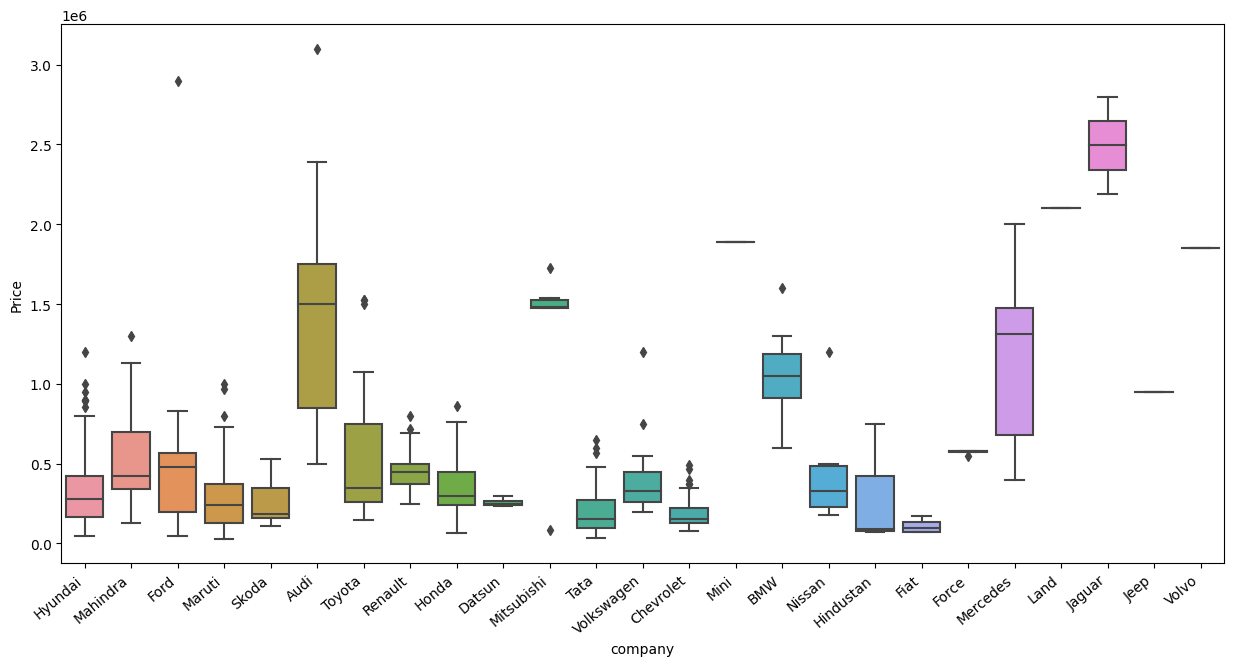

In [49]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Checking relationship of Year with Price

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed

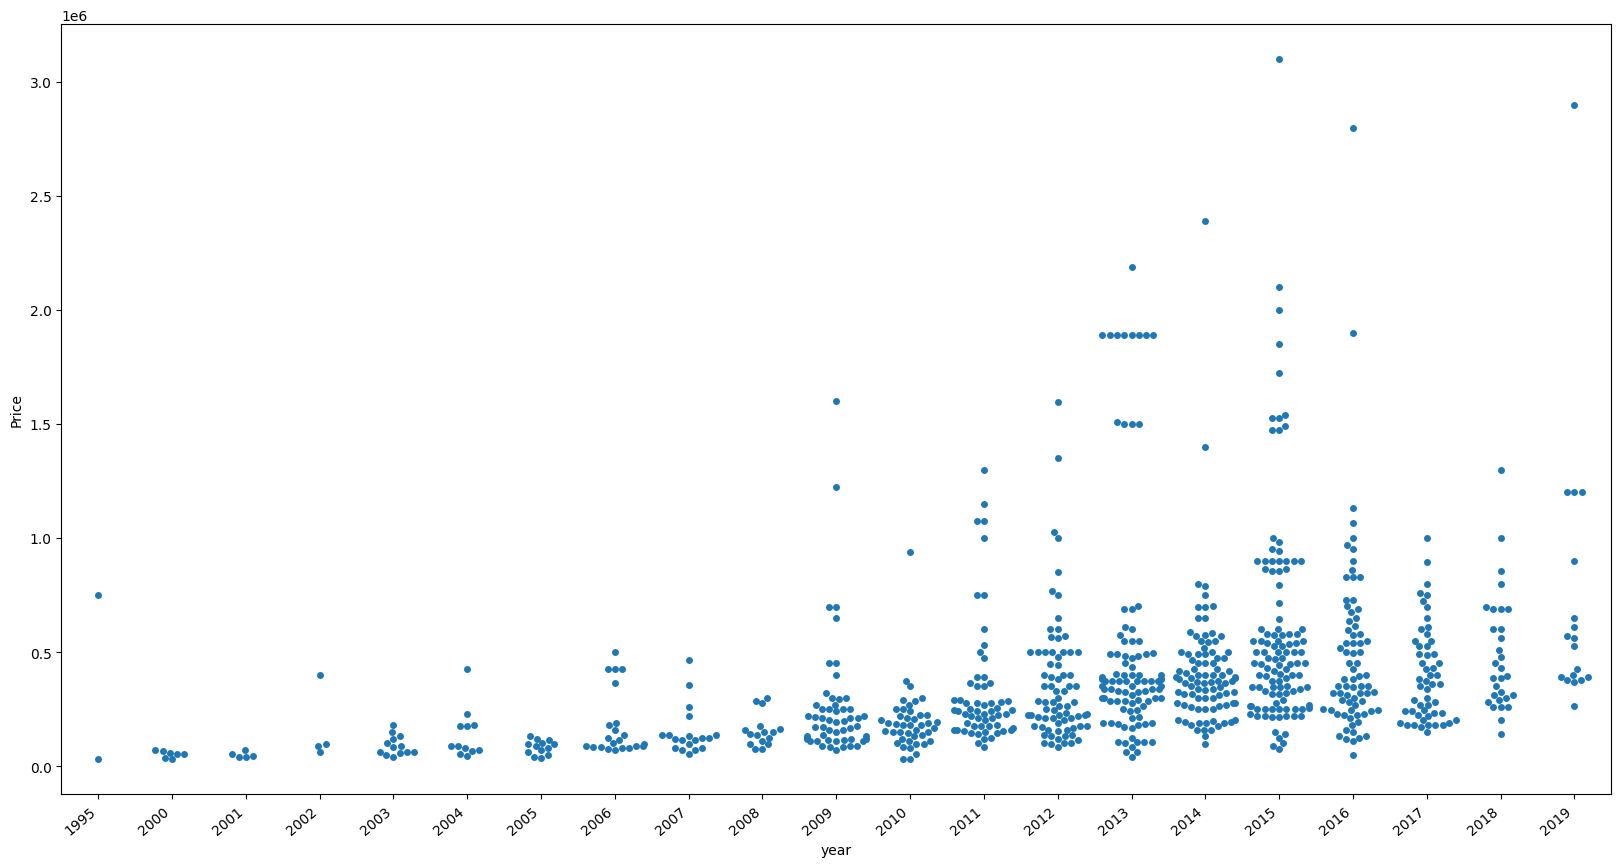

In [50]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Checking relationship of kms_driven with Price

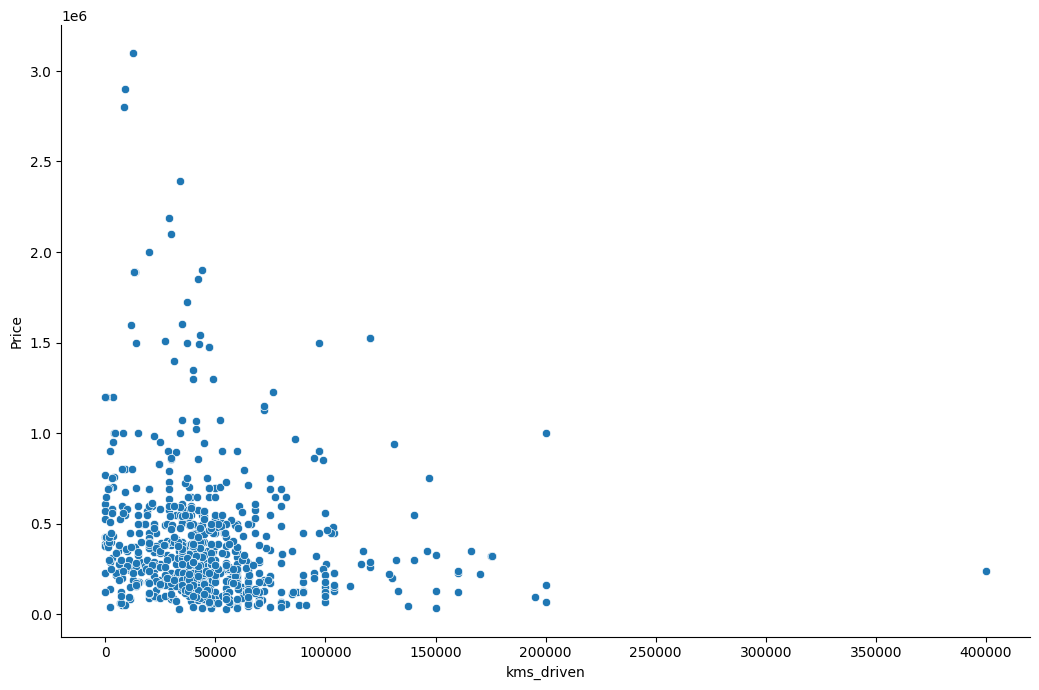

In [51]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

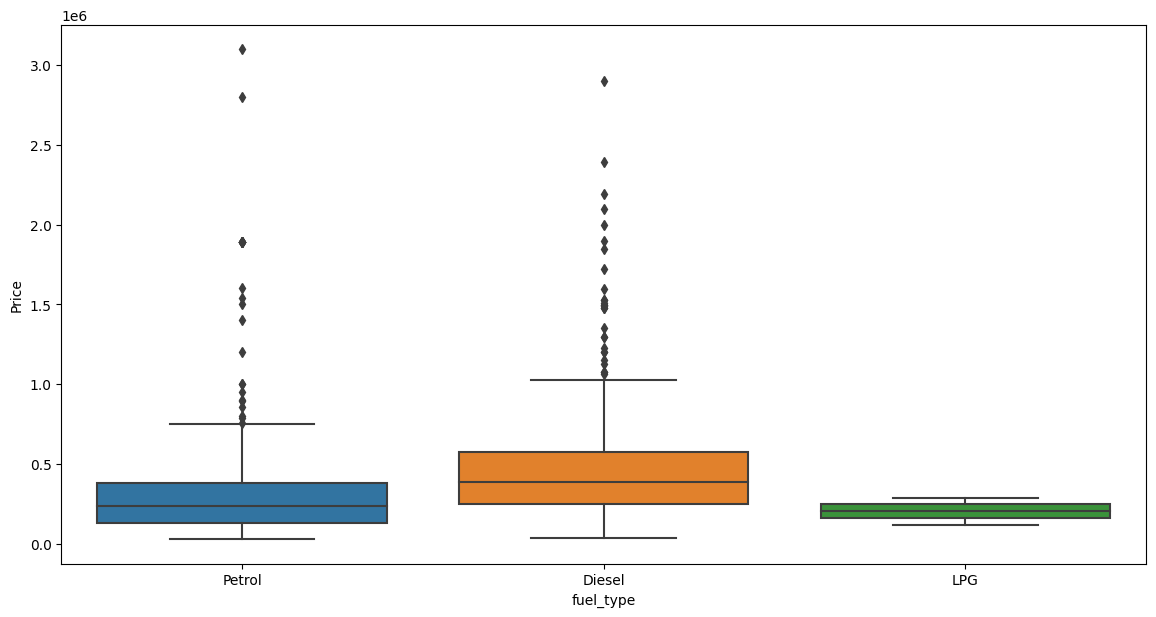

In [52]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

Relationship of Price with FuelType, Year and Company mixed

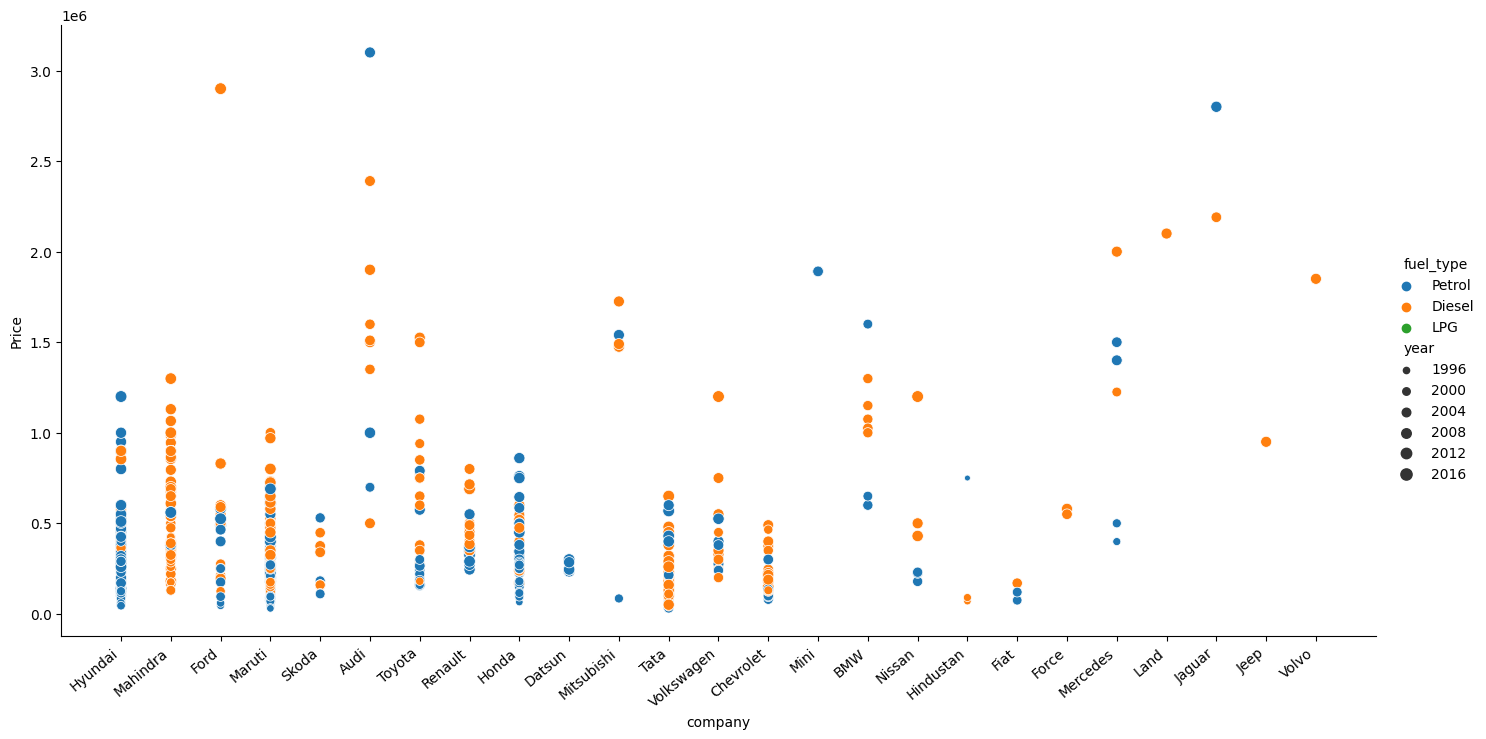

In [53]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

# Modeling


Extracting Training Data

In [54]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [55]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


Applying Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

Creating an OneHotEncoder object to contain all the possible categories

In [60]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

Creating a column transformer to transform categorical columns

In [61]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')


Linear Regression Model

In [62]:
lr=LinearRegression()

Making a pipeline

In [63]:

pipe=make_pipeline(column_trans,lr)

Fitting the model

In [64]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [65]:
y_pred=pipe.predict(X_test)

Checking R2 Score

In [66]:
r2_score(y_test,y_pred)

0.5494342692729804

Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [67]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [68]:
np.argmax(scores)

302

In [69]:
scores[np.argmax(scores)]

0.8991190499074018

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991190499074018

# Pickle model

In [74]:
import pickle

In [75]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

# New Section